In [58]:
# import numpy as np
# import matplotlib.pyplot as plt

# def show_mask(mask, ax, random_color=False):
#     if random_color:
#         color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
#     else:
#         color = np.array([30/255, 144/255, 255/255, 0.6])
#     h, w = mask.shape[-2:]
#     mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
#     ax.imshow(mask_image)


# def show_box(box, ax):
#     x0, y0 = box[0], box[1]
#     w, h = box[2] - box[0], box[3] - box[1]
#     ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

# def show_boxes_on_image(raw_image, boxes):
#     plt.figure(figsize=(10,10))
#     plt.imshow(raw_image)
#     for box in boxes:
#       print("Box", box)
#       show_box(box, plt.gca())
#     plt.axis('on')
#     plt.show()

# def show_points_on_image(raw_image, input_points, input_labels=None):
#     plt.figure(figsize=(10,10))
#     plt.imshow(raw_image)
#     input_points = np.array(input_points)
#     if input_labels is None:
#       labels = np.ones_like(input_points[:, 0])
#     else:
#       labels = np.array(input_labels)
#     show_points(input_points, labels, plt.gca())
#     plt.axis('on')
#     plt.show()

# def show_points_and_boxes_on_image(raw_image, boxes, input_points, input_labels=None):
#     plt.figure(figsize=(10,10))
#     plt.imshow(raw_image)
#     input_points = np.array(input_points)
#     if input_labels is None:
#       labels = np.ones_like(input_points[:, 0])
#     else:
#       labels = np.array(input_labels)
#     show_points(input_points, labels, plt.gca())
#     for box in boxes:
#       show_box(box, plt.gca())
#     plt.axis('on')
#     plt.show()


# def show_points_and_boxes_on_image(raw_image, boxes, input_points, input_labels=None):
#     plt.figure(figsize=(10,10))
#     plt.imshow(raw_image)
#     input_points = np.array(input_points)
#     if input_labels is None:
#       labels = np.ones_like(input_points[:, 0])
#     else:
#       labels = np.array(input_labels)
#     show_points(input_points, labels, plt.gca())
#     for box in boxes:
#       show_box(box, plt.gca())
#     plt.axis('on')
#     plt.show()


# def show_points(coords, labels, ax, marker_size=375):
#     pos_points = coords[labels==1]
#     neg_points = coords[labels==0]
#     ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
#     ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


# def show_masks_on_image(raw_image, masks, scores, boxes, labels):
#     if len(masks.shape) == 4:
#       masks = masks.squeeze()
#     if scores.shape[0] == 1:
#       scores = scores.squeeze()

#     nb_predictions = scores.shape[-1]
#     fig, axes = plt.subplots(1, nb_predictions, figsize=(15, 15))

#     for i, (mask, score) in enumerate(zip(masks, scores)):
#       mask = mask.cpu().detach()
#       axes[i].imshow(np.array(raw_image))
#       show_mask(mask, axes[i])
#       axes[i].title.set_text(f"Mask {i+1}, Score: {score.item():.3f}")
#       axes[i].axis("off")
#     plt.show()

In [65]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import torch
from scipy import ndimage

def calculate_center_of_mass(mask):
    """
    Calculate the center of mass for the largest contiguous object within a binary mask.
    
    Parameters:
    - mask: A 2D numpy array where the mask is boolean.
    
    Returns:
    - Tuple of (y, x) coordinates of the center of mass for the largest object.
    """
    labeled_mask, num_features = ndimage.label(mask)
    if num_features == 0:
        return None  # Return None if no features are found
    
    # Find the area of each feature
    area = ndimage.sum(mask, labeled_mask, range(1, num_features + 1))
    largest_feature = area.argmax() + 1  # Index of the largest feature
    
    # Calculate the center of mass for the largest feature
    center_of_mass = ndimage.center_of_mass(mask, labeled_mask, largest_feature)
    print("Center of mass", center_of_mass)
    return center_of_mass

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image, interpolation='none', alpha=0.5)

def show_box(ax, box, label, color='green'):
    # Box is expected to be [x0, y0, x2, y2]
    x0, y0 = box[0], box[1]
    width, height = box[2] - box[0], box[3] - box[1]
    rect = Rectangle((x0, y0), width, height, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x0, y0, label, bbox=dict(facecolor='yellow', alpha=0.5), clip_box=ax.clipbox, clip_on=True)

def show_masks_on_image(raw_image, masks, scores, boxes, labels):
    if len(masks.shape) == 4:
        masks = masks.squeeze()
    if scores.shape[0] == 1:
        scores = scores.squeeze()

    nb_predictions = scores.shape[-1]
    fig, axes = plt.subplots(1, nb_predictions, figsize=(15, 15))

    for i, (mask, score, box, label) in enumerate(zip(masks, scores, boxes, labels)):
        mask = mask.cpu().detach().numpy()  # Convert to numpy array
        print("Mask shape: ", mask.shape)
        center_of_mass = calculate_center_of_mass(mask)
        
        axes[i].imshow(np.array(raw_image))
        show_mask(mask, axes[i])
        show_box(axes[i], box, label)
        
        if center_of_mass:
            # Plot center of mass
            axes[i].plot(center_of_mass[1], center_of_mass[0], 'ro')  # 'ro' for red circle
        
        axes[i].title.set_text(f"Mask {i+1}, Score: {score.item():.3f}, CoM: {center_of_mass}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


    plt.tight_layout()
    plt.show()

In [60]:
import torch
from transformers import SamModel, SamProcessor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

In [61]:
from ultralytics import YOLO
from PIL import Image
yolo_model= YOLO('yolov8l-world.pt')

In [62]:
def get_segmentation(raw_image, input_boxes, labels):
    inputs = processor(raw_image, input_boxes=input_boxes, return_tensors="pt").to(device)
    image_embeddings = model.get_image_embeddings(inputs["pixel_values"])
    inputs["input_boxes"].shape
    inputs.pop("pixel_values", None)
    inputs.update({"image_embeddings": image_embeddings})
    

    with torch.no_grad():
        outputs = model(**inputs, multimask_output=False)

    masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
    print(masks)
    scores = outputs.iou_scores
    return masks, scores



In [63]:
def get_segmentations_from_yolo(image):
    results = yolo_model.predict(image, conf=0.2)
    boxes_xyxy = results[0].boxes.xyxy
    print("Boxes ", boxes_xyxy.tolist())
    formatted_boxes = [boxes_xyxy.tolist()]
    # Ensure each box is a flat list of [x0, y0, x2, y2]
    boxes_for_display = boxes_xyxy.tolist()
    names = [results[0].names[int(idx)] for idx in results[0].boxes.cls.tolist()]
    masks, scores = get_segmentation(image, formatted_boxes, names)
    show_masks_on_image(image, masks[0], scores, boxes_for_display, names)

        
        # for idx, box in enumerate(boxes_xyxy):
        #     box_list = box.tolist()
        #     # Crop the image
        #     #crop = image.crop((box_list[0], box_list[1], box_list[2], box_list[3]))
        #     label = [result.names[int(result.boxes[idx].cls)]]


0: 480x640 4 desks, 2 couchs, 18.7ms
Speed: 1.4ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Boxes  [[336.8848876953125, 205.9814910888672, 600.79736328125, 365.89276123046875], [0.0400543212890625, 316.06085205078125, 84.33204650878906, 480.0], [280.66815185546875, 279.0719299316406, 455.60870361328125, 422.5183410644531], [286.265380859375, 287.147216796875, 639.8899536132812, 479.9407958984375], [423.1199951171875, 197.6085205078125, 614.557373046875, 281.3228759765625], [587.0892333984375, 240.41143798828125, 640.0, 312.33984375]]
[tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]],


        [[[False, False, False,  ...,

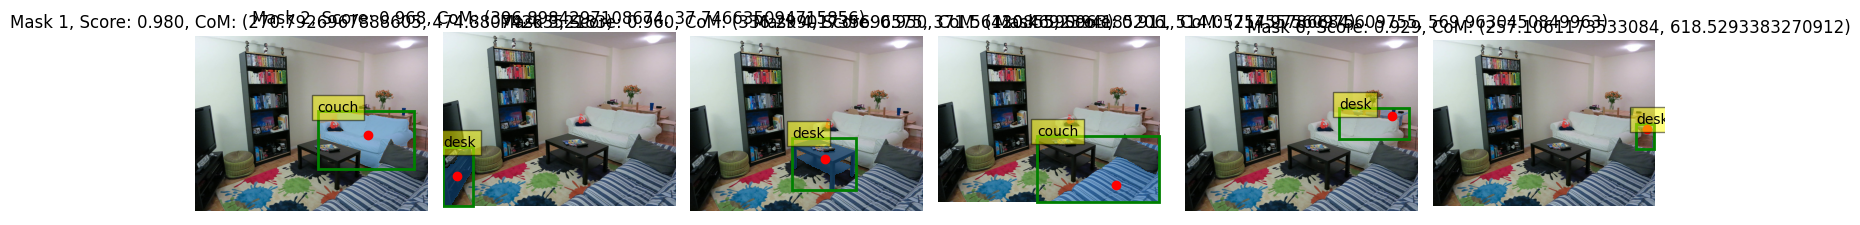

<Figure size 640x480 with 0 Axes>

In [66]:
image_file = '../glip_server/test_2.jpg'
image_input = Image.open(image_file)
classes = ["desk", "keyboard", "plant", "refrigerator", "couch", "table"]
yolo_model.set_classes(classes)
get_segmentations_from_yolo(image_input)